![Astrofisica Computacional](data/logo.PNG)

---
## 05. Busqueda de Raices


Code by Carlos Andrés del Valle (cdelv@unal.edu.co)

Theory by Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

En este cuaderno se describen algunas de las técnicas para encontrar numéricamente las raices de una función. 

---

En muchas ocasiones, es necesario encontrar las raices de una función , i.e. aquellos valores de la variable independiente $x_r$ para los cuales $f(x_r) = 0$. En general, $x_r$ puede representar uno o multiples variables y $f$ puede ser una sola función o puede representar un sistema de ecuaciones. También es posible que $f$ dependa explicitamente de $x$ o que $f$ dependa implicitamente de $x$.

---
## Método de Newton-Raphson 

Existen multiples métodos para encontrar las raices de una función, pero el más popular de ellos es el método de **Newton-Raphson**. Para describir esta técnica, debemos considerar la expansión en serie de Taylor de la función $f(x)$ alrededor de la raíz $x_r$, 

\begin{equation}
f(x_r) = f(x) + (x_r - x) f'(x) +  \mathcal{O}( (x_r - x)^2) \approx 0 .
\end{equation}

El valor $x_r$ debe entenderse como el valor de la raíz en el paso $n$-ésimo en un proceso iterativo. Por lo tanto, en el paso $n+1$ de la iteración, a primer orden, se tendrá

\begin{equation}
f(x_{n+1}) = f(x_n) + (x_{n+1} - x_{n})
f'(x_n) \approx 0 ,
\end{equation}

de donde despejamos

\begin{equation}
x_{n+1} =  x_n - \frac{f(x_n)}{f'(x_n)} .
\end{equation}

La implementación de este procedmiento iterativo se dentendrá cuando el cambio fraccionario entre los resultados de la iteración $n$ y $n+1$ isea más pequeña que la precisión de punto flotante (epsilon de la máquina)

\begin{equation}
\left| \frac{[f(x_{n+1}) - f(x_{n})]}{f({x_n})} \right| < \epsilon .
\end{equation}

La convergencia del método de Newton-Raphson Method es de segundo orden si $f(x)$ se comporta bien y si el valor incial para el procedimiento  $x_0$ es un punto cercano al valor de la raíz.

Nota Importante: Este método necesita conocer la forma analítica de la primera derivada $f'(x)$. Si este no es el caso, se necesitará evaluar numéricamnete esta derivada y la técnica se denominará el **método de la secante**.

---
### Método de la secante

El método de la secante es similar al método de Newton-Raphson, pero la primera derivada $f'(x_n)$ es evaluada numericamente. Usualmente esta se evalua con diferencias hacia atrás, con lo que se obtiene el proceso iterativo

\begin{equation}
x_{n+1} = x_{n} - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}\,\,.
\end{equation}

Note que este proceso iterativo necesita dos puntos para iniciar, o al menos un valor inicial de la primera derivada, i.e. $f'(x_0)$.  Debido a la inclusion del procedimiento numérico para estimar la primera derivada, el método de la secante converge mas lentamente que el método de Newton-Raphson. 

#### Ejemplo. Raices de una función discreta utilizando el método de Newton-Raphson ( secante ) 

La información de la función sera leida de un archivo .txt y se encontrará numéricamente la raiz de la función aplicando el método de Newton-Raphson (o secante). Se utilizará una interpolación cuadrática por intervalos para modelar la función. 

Antrs de localizar numéricamente la rai´z, se visualizará el comportamiento de la función. 

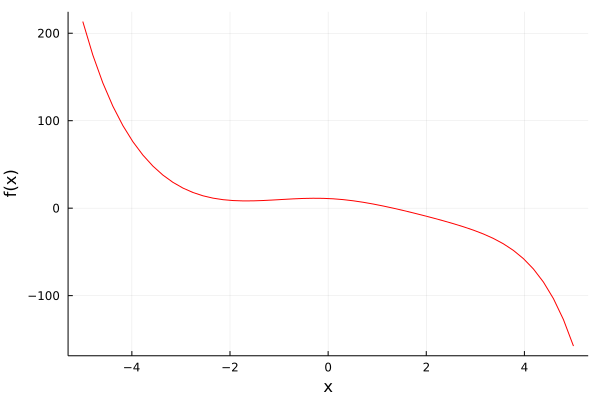

In [1]:
using DelimitedFiles

data = readdlm("data/05_Raices/data_points.txt", ',', comments=true, comment_char='#')
x = data[:,1]
f = data[:,2]
N = length(x)

using Plots
plot(x,f,label="",color="red")
xlabel!("x")
ylabel!("f(x)")

 Del gráfico, se observa qye la raíz debe ubicarse en el intervalo entre $x=0$ y $x=2$. Por ello nos restringiremos a esta región:

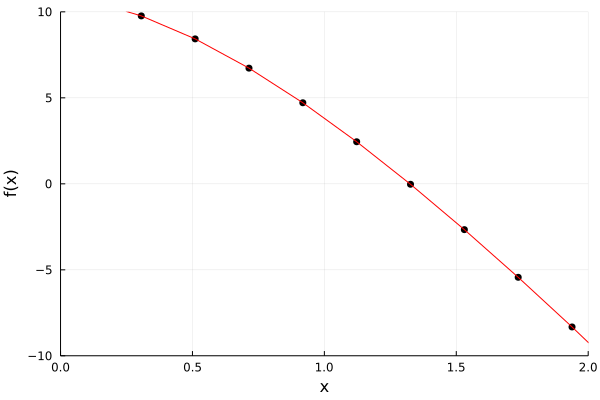

In [2]:
scatter(x, f, color="black",label="")
plot!(x,f,label="",color="red")
xlabel!("x")
ylabel!("f(x)")
xlims!(0,2)
ylims!(-10,10)

Este zoom muestra el interior del intervalo  $1<x<1.75$. Nos concentraremos en los tres puntos en el medio del intervalo con el fin de interpolar un polinómio cuadrático y aplicar el método de busqueda de raices.

In [3]:
x_data = data[:,1]
f_data = data[:,2]

# Find the initial and final points of the restricted interval of 
# three points to interpolate.
a=0
for i in 1:length(x_data)-1
    if x_data[i]>=1
        a=i
        break
    end
end

# The interval will include three points:
# x[a], x[a+1], x[a+2]
# Here we define the arrays that enter as arguments
# for the interpolated polynomial
x_int =[x_data[a], x_data[a+1], x_data[a+2]]
f_int =[f_data[a], f_data[a+1], f_data[a+2]]

println("a = ", a, ": x_a = ", x_data[a], ": f(x_a) = ", f_data[a])
println("a = ", 32, ": x_a = ", x_data[32], ": f(x_a) = ", f_data[32])

a = 31: x_a = 1.12245: f(x_a) = 2.44474
a = 32: x_a = 1.32653: f(x_a) = -0.0279679


Ahora, utilizamos el polinomio cuadrático interpolado y utilizamos el métodos de Newton-Raphson (o secante).

In [4]:
# 2-order Interpolated Polynomial 
function p2(x)
    pol = (((x-x_int[2])*(x-x_int[3]))/((x_int[1]-x_int[2])*(x_int[1]-x_int[3])))*f_int[1] +
          (((x-x_int[1])*(x-x_int[3]))/((x_int[2]-x_int[1])*(x_int[2]-x_int[3])))*f_int[2] +
          (((x-x_int[1])*(x-x_int[2]))/((x_int[3]-x_int[1])*(x_int[3]-x_int[2])))*f_int[3]
    return pol
end


# Newton-Raphson Method. We begin with the value at point x[a]
root0 = x_data[a]-1e-5
root = x_data[a]

while abs(p2(root))>1e-10
    new_root = root - p2(root)*(root - root0)/(p2(root) - p2(root0))
    root0, root = root, new_root
end

using Printf
@printf("La raiz es xᵣ = %.8f\n",root)
@printf("para la cual la función interpolada da un valor de f(xᵣ) = %.8e\n",p2(root))

La raiz es xᵣ = 1.32429525
para la cual la función interpolada da un valor de f(xᵣ) = 7.09501902e-16


Podemos visualizar la ubicación de la raíz,

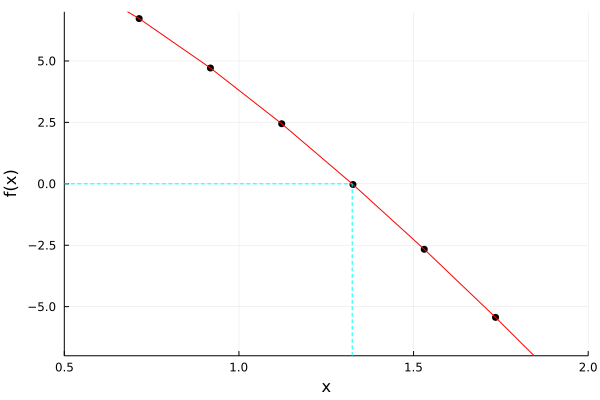

In [5]:
scatter(x, f, color="black",label="")
plot!(x,f,label="",color="red")
plot!([-7, root], [0, 0],color="cyan",label="", linestyle=:dash)
plot!([root, root], [-7, p2(root)],color="cyan",label="", linestyle=:dash)
xlabel!("x")
ylabel!("f(x)")
xlims!(0.5,2)
ylims!(-7,7)

---
## Método de la Bisección

El método de bisección esta basado en el teorema del valor intermedio, que establee que una función continua $f(x)$ debe poseer al menos una raíz en el intervalo $[x_a,x_b]$ si $f(x_a)$ y
$f(x_b)$ tienen signos opuestos.

De esta forma, el método de la bisección se implementa en la siguiente forma,

1. Se eligen dos valores iniciales  $x_a$ y $x_b$ tales que $f(x_a)$ y $f(x_b)$ tnegan signos opuestos.

2. Se calcula el punto medio $x_c = \frac{x_a+x_b}{2}$ y el valor de la función allí, $f(x_c)$. 

3. Si $f(x_c) = 0$ o
  $\left| \frac{f(x_c) - f(x_a)}{f(x_a)} \right| < \epsilon$ or $\left| \frac{f(x_c) - f(x_b)}{f(x_b)} \right| <
  \epsilon$, la raíz se ha encontrado.
  
  Si este no es el caso, entonces:
    * si $f(x_a)$ y $f(x_c)$ tienen signos opuestos, entonces ellos encierran la raíz. Volvemos al punto (2) con $x_a=x_a$ y $x_b=x_c$.
      
    * Si $f(x_c)$ y $f(x_b)$ tienen signos opuestos, entonces ellos encierran la raíz. Volvemos al punto (2) con $x_a=x_c$ y $x_b=x_b$.
  

A pesar de que el método de la bisección es muy robusto y eficiente, generalmente no es tán rápido como el método de Newton porque requiere de más iteraciones para encontrar la raíz.


#### Ejemplo. Raices de una función discreta con le método de la bisección.

In [6]:
# Bisection Method. 
# We begin with the values at the points x_data[a] and x_data[a+2]
x_a = x_data[a]
x_b = x_data[a+2]
x_c = (x_a + x_b)/2.

while abs(p2(x_c)) > 1e-15
    x_c = (x_a + x_b)/2.
    if p2(x_a)*p2(x_c) < 0
        x_b = x_c
    else
        x_a = x_c
    end
end

root = x_c
    
@printf("La raiz es xᵣ = %.8f\n",root)
@printf("para la cual la función interpolada da un valor de f(xᵣ) = %.8e\n",p2(root))

La raiz es xᵣ = 1.32429525
para la cual la función interpolada da un valor de f(xᵣ) = 7.09501902e-16
